In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense


In [4]:
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

batch_size = 32
img_size = (150, 150)

train_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Sugarcane Leaf Disease Dataset',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Sugarcane Leaf Disease Dataset',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 1209 images belonging to 5 classes.
Found 301 images belonging to 5 classes.


In [8]:
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(5))  # Sesuaikan dengan jumlah kelas penyakit
model.add(Activation('softmax'))


In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

epochs = 20  # Sesuaikan dengan jumlah epoch yang diperlukan
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)


Epoch 1/20
37/37 [==============================] - 331s 9s/step - loss: 1.2587 - accuracy: 0.3500 - val_loss: 1.0423 - val_accuracy: 0.4271
Epoch 2/20
37/37 [==============================] - 62s 2s/step - loss: 0.9739 - accuracy: 0.5123 - val_loss: 1.1396 - val_accuracy: 0.4688
Epoch 3/20
37/37 [==============================] - 57s 2s/step - loss: 0.8432 - accuracy: 0.6253 - val_loss: 1.0582 - val_accuracy: 0.5729
Epoch 4/20
37/37 [==============================] - 55s 1s/step - loss: 0.8565 - accuracy: 0.6194 - val_loss: 1.1186 - val_accuracy: 0.5903
Epoch 5/20
37/37 [==============================] - 59s 2s/step - loss: 0.7176 - accuracy: 0.7077 - val_loss: 0.8615 - val_accuracy: 0.6389
Epoch 6/20
37/37 [==============================] - 59s 2s/step - loss: 0.6639 - accuracy: 0.7375 - val_loss: 0.9188 - val_accuracy: 0.6319
Epoch 7/20
37/37 [==============================] - 59s 2s/step - loss: 0.6677 - accuracy: 0.7128 - val_loss: 0.8331 - val_accuracy: 0.6528
Epoch 8/20
37/37 [=

In [11]:
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


10/10 [==============================] - 7s 660ms/step - loss: 0.6639 - accuracy: 0.7508
Test Accuracy: 75.08%


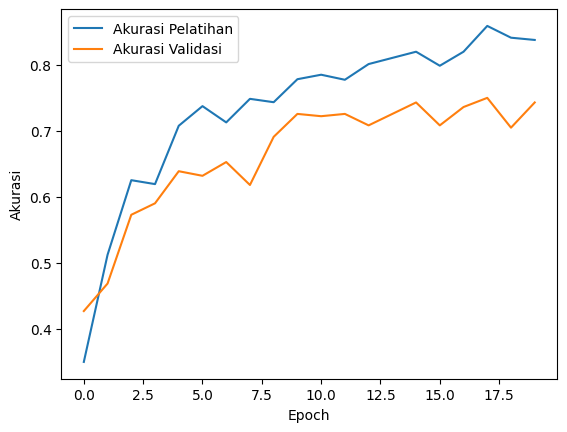

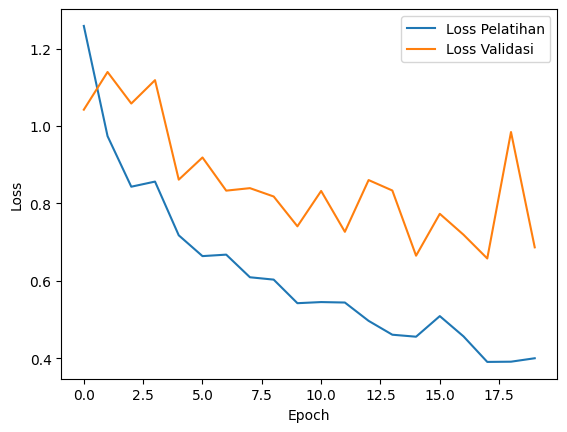

In [12]:
import matplotlib.pyplot as plt



# Plot akurasi
plt.plot(history.history['accuracy'], label='Akurasi Pelatihan')
plt.plot(history.history['val_accuracy'], label='Akurasi Validasi')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Loss Pelatihan')
plt.plot(history.history['val_loss'], label='Loss Validasi')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Saving redrot (9).jpeg to redrot (9).jpeg
1/1 [==============================] - 0s 30ms/step


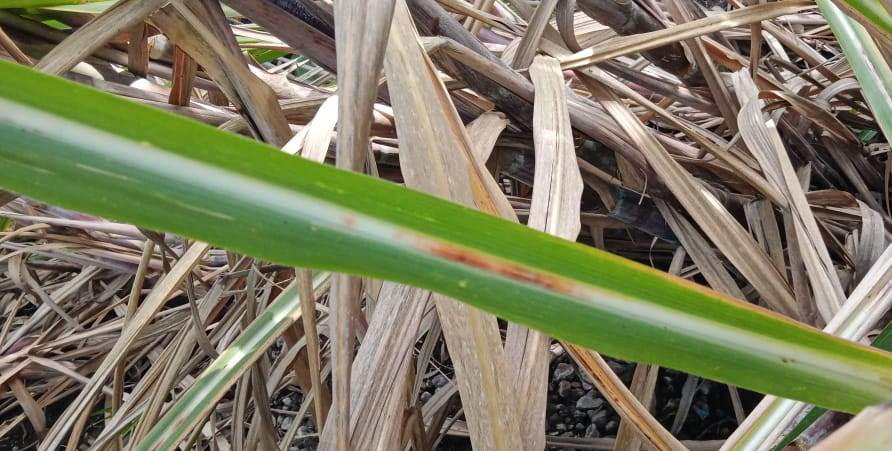

Predicted class: RedRot


In [21]:
from google.colab import files
from IPython.display import Image
from tensorflow.keras.preprocessing import image
import numpy as np

# Load your model here
# model = ...

uploaded = files.upload()

for filename in uploaded.keys():
    img_path = filename
    img = image.load_img(img_path, target_size=(150, 150))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)

    result = model.predict(img)
    class_labels = train_generator.class_indices
    predicted_class = list(class_labels.keys())[list(class_labels.values()).index(np.argmax(result, axis=1)[0])]

    # Display the uploaded image
    display(Image(filename=filename, width=150, height=150))
    print(f"Predicted class: {predicted_class}")
